# PRIMA SIMULAZIONE DI RICHARDS CON WHETGEO1D
    -Author: Niccolò Tubini, Concetta D'Amato and Riccardo Rigon
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
-----
This code allows to plot the output of WHETGEO 1D by reading the netDCF output file of your simulation.<br>

Per la prima simulazione di Richards si è deciso di analizzare due tipi di precipitazione su una colonna di suolo a fondo <b>impermeabile</b> di questa composizione:<br><ul> <li>loam per $0 \leq z \leq -1$ metri;</li> <li>sandy loam per $-1\leq z\leq -3$ metri;</li><li>clay per $-3\leq z\leq -6$ metri.</li></ul>
La falda è stata impostata a -6m.<br>

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import matplotlib.style as style 
from matplotlib import rc
import xarray as xr
import datetime

####### Plot settings #######
nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.3,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())
project_path

'C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students'

## Import your NetCDF file

In [6]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\output')
os.listdir()

['.DS_Store',
 'Integrate PDE',
 'WHETGEO_1205_0000.nc',
 'WHETGEO_1205_2_0000.nc',
 'WHETGEO_1305_0000.nc',
 'WHETGEO_1305_es2_0000.nc',
 'WHETGEO_bomba01_0000.nc',
 'WHETGEO_bomba01_new_0000.nc',
 'WHETGEO_bomba02_0000.nc',
 'WHETGEO_bomba03_0000.nc',
 'WHETGEO_bomba04_0000.nc',
 'WHETGEO_doppiofrontizio_0000.nc',
 'WHETGEO_doppiofrontizio_1perm_0000.nc',
 'WHETGEO_doppiofrontizio_2perm_0000.nc',
 'WHETGEO_doppiofrontizio_3imp_0000.nc',
 'WHETGEO_doppiofrontizio_4perm_0000.nc',
 'WHETGEO_frontizio01_0000.nc',
 'WHETGEO_frontizio02_0000.nc',
 'WHETGEO_frontizio03_0000.nc',
 'WHETGEO_frontizio04_0000.nc']

In [7]:
file_name = 'WHETGEO_doppiofrontizio_0000.nc'

In [8]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:        (depth: 81, dualDepth: 81, time: 2208)
Coordinates:
  * depth          (depth) float64 -5.925 -5.775 -5.625 ... -0.05 -0.01667 0.0
  * dualDepth      (dualDepth) float64 -6.0 -5.85 -5.7 ... -0.06667 -0.03333 0.0
  * time           (time) datetime64[ns] 2020-06-01 ... 2020-08-31T23:00:00
Data variables:
    psi            (time, depth) float64 ...
    psiIC          (depth) float64 ...
    T              (depth) float64 ...
    theta          (time, depth) float64 ...
    darcyVelocity  (time, dualDepth) float64 ...
    waterVolume    (time, depth) float64 ...
    error          (time) float64 ...
    topBC          (time) float64 ...
    bottomBC       (time) float64 ...
    runOff         (time) float64 ...
    controlVolume  (depth) float64 ...
Attributes:
    Description_of_the_problem:         grid:  data/Grid_NetCDF/Richards_coup...
    Top_boundary_condition:              
    Bottom_boundary_condition:           
    path_top_boundary_conditio

## Precipitation Timeseries

In [9]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\data\\Timeseries')
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'All_0.csv',
 'All_0_2020.csv',
 'bomba_10mm.csv',
 'data.csv',
 'doppiofrontizio.csv',
 'frontizio_01mm.csv',
 'LAI_sin.csv',
 'Prec.csv',
 'Prec_out_13.csv',
 'Prec_out_5m.csv',
 'prova.csv',
 'save.csv',
 'save15.csv',
 'savees.csv']

In [10]:
file_name = 'doppiofrontizio.csv' 

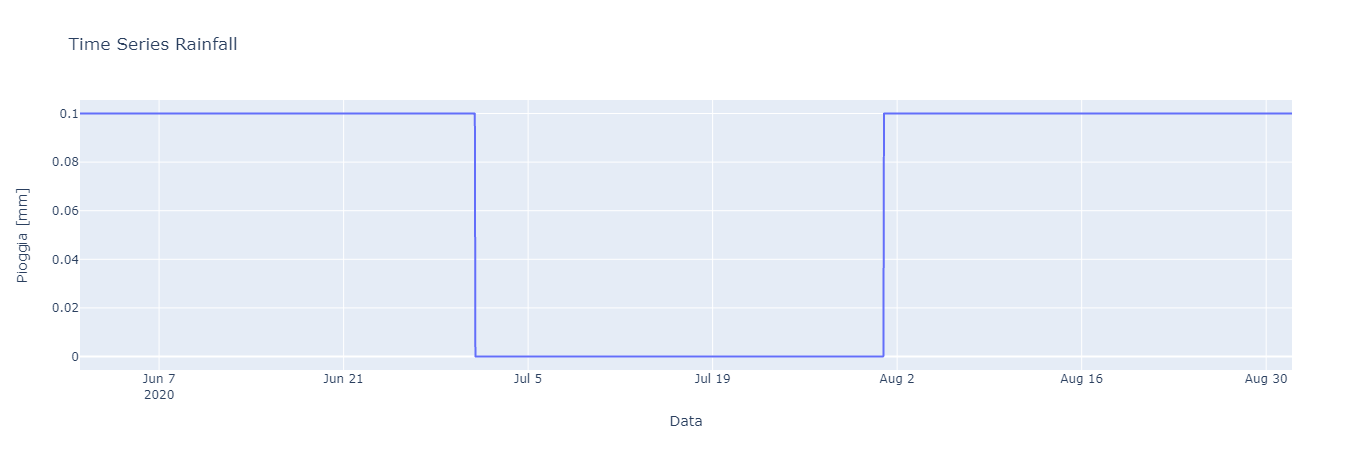

In [11]:
kl = pd.read_csv(file_name,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Data'
kl.columns.values[1] = 'Pioggia [mm]' 
fig = px.line(kl, x='Data', y='Pioggia [mm]', title='Time Series Rainfall')
fig.show()

## Plot water suction $\psi$

 ### Intial condition for water suction $\psi$

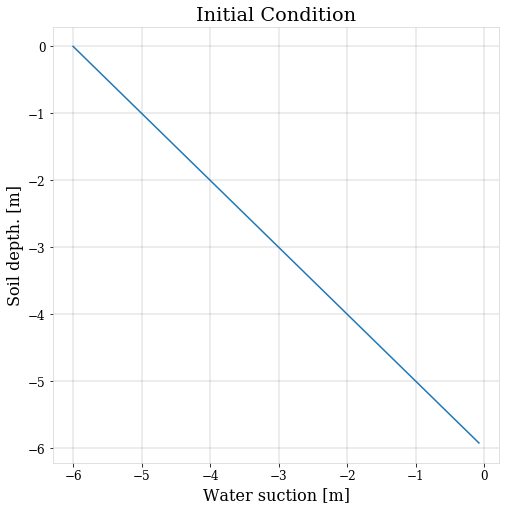

In [12]:
fig = plt.figure(figsize=(8,13/1.62))
ds.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]') 
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

 ### Water suction $\psi$ among the soil depth in your simulation  

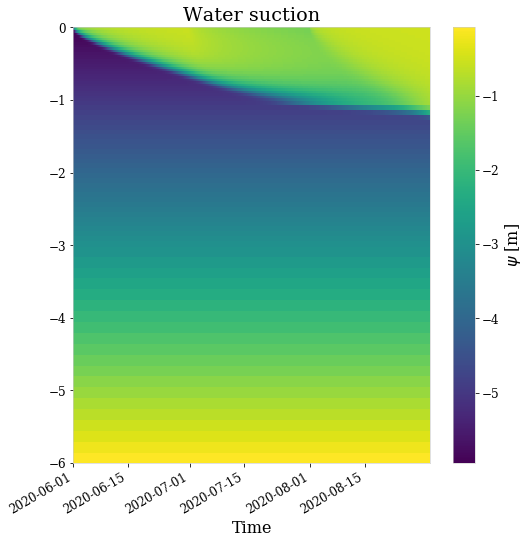

In [13]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')

Come si nota dal grafico inizialmente il terreno si trova in condizioni idrostatiche con falda a -6m. Una volta iniziata la precipitazione l'acqua si accumula nel primo strato di terra andando ad aumentare $\psi$. Dal momento che la precipitazione è assente si nota un leggero cambiamento di colore all'interfaccia con l'atmosfera nel mese di luglio.

## Plot water content  $\theta$

 ### Water content $\theta$ among the soil depth in your simulation  

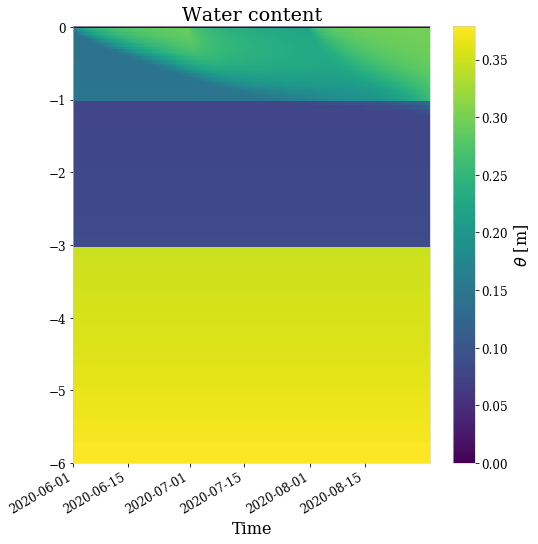

In [14]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')

lo strato di <b>loamy sand</b> è insaturo e presenta un contenuto di acqua maggiore solo a fine agosto, mentre lo strato di argilla sottostante presenta una $\theta\simeq 0.38$ dato dalla risalita capillare della falda sottostante posta a -6m.

### Plot specifical depth
Define a vector of depth 'myDepth' you would plot 

In [15]:
myDepth = [-0.1,-1.0,-3,-6]

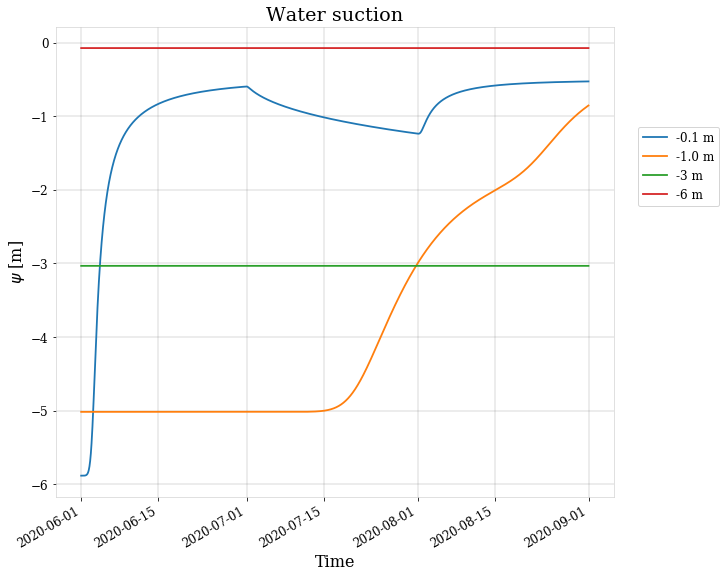

In [16]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.psi.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

<font color="blue">A -0.1m si nota come la $\psi$, dalla condizione iniziale di -6m passa a circa -0.5m a causa dell'accumulo di acqua.</font>
<br><font color="orange">All'interfaccia tra <b>loam</b> e <b>sandy loam</b> avviene un aumento di suzione solo a metà luglio, in quanto l'acqua impiega del tempo ad infiltrarsi.</font><br>
<font color="green">A -3m si trova l'interfaccia tra <b>loamy sand</b> e <b>clay</b> e qui si ha un andamento costante di $\psi$ ovvero persiste la condizione idrostatica.</font><br>
<font color="red">Anche sul fondo del volume di controllo non varia la condizione idrostatica.</font>

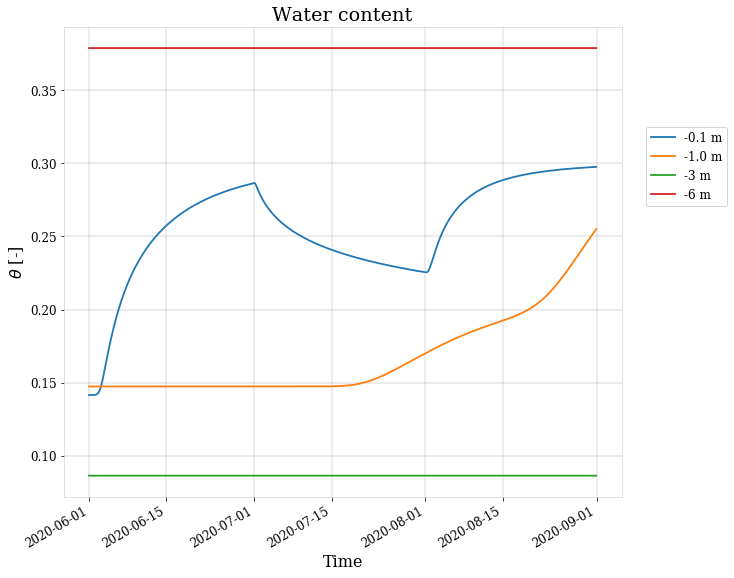

In [17]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.theta.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\\theta$ [-]')
plt.xlabel('Time')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [18]:
myDate = ['2020-06-01 00:00:00','2020-06-30 00:00:00','2020-08-01 00:00:00','2020-08-31 00:00:00']

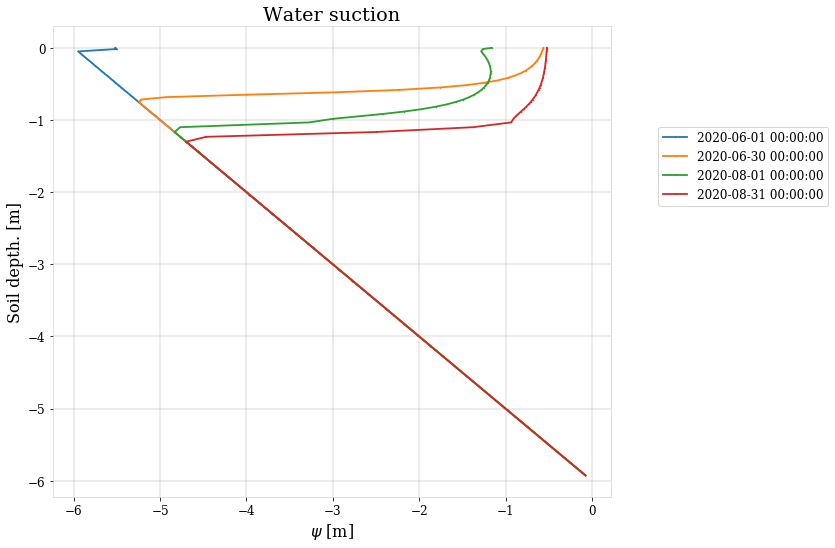

In [19]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.psi.sel(time=myDate[i],).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

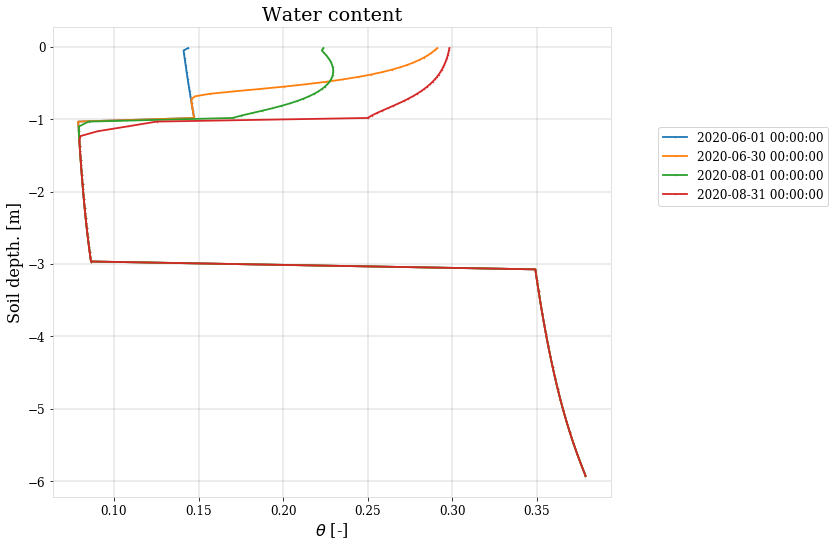

In [20]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.theta.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot top-bottom flux 

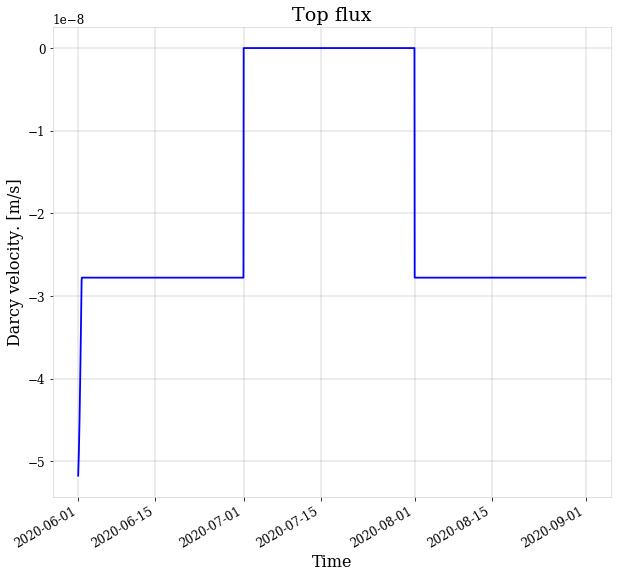

In [21]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[len(ds.dualDepth)-1], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

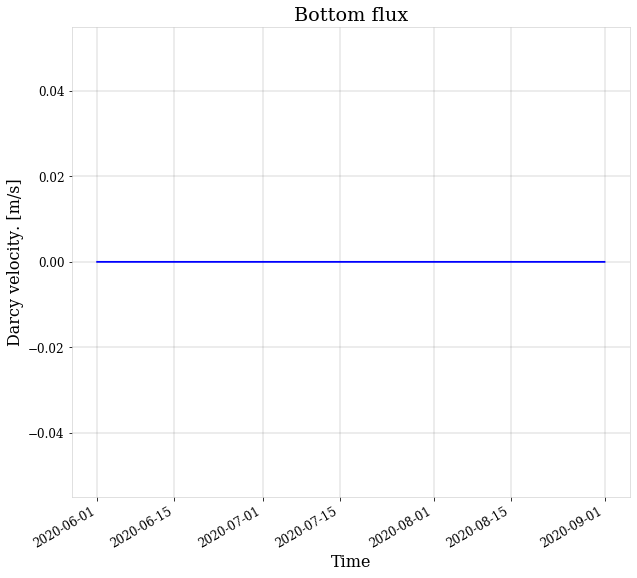

In [22]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[0], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot Error 

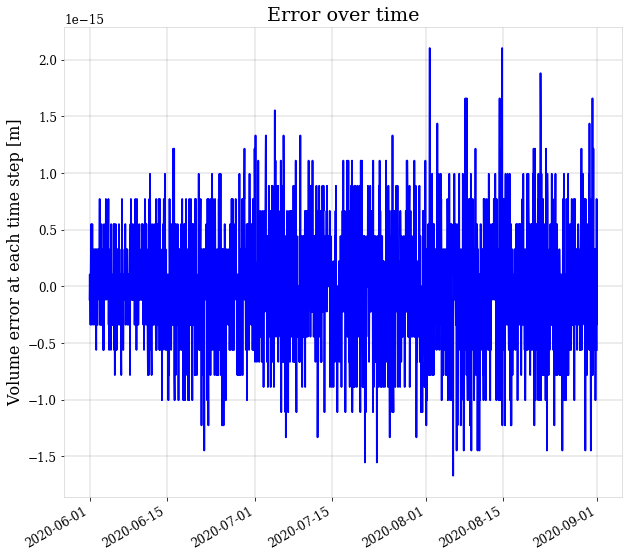

In [23]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.error.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Import your NetCDF file

In [24]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\output')
os.listdir()

['.DS_Store',
 'Integrate PDE',
 'WHETGEO_1205_0000.nc',
 'WHETGEO_1205_2_0000.nc',
 'WHETGEO_1305_0000.nc',
 'WHETGEO_1305_es2_0000.nc',
 'WHETGEO_bomba01_0000.nc',
 'WHETGEO_bomba01_new_0000.nc',
 'WHETGEO_bomba02_0000.nc',
 'WHETGEO_bomba03_0000.nc',
 'WHETGEO_bomba04_0000.nc',
 'WHETGEO_doppiofrontizio_0000.nc',
 'WHETGEO_doppiofrontizio_1perm_0000.nc',
 'WHETGEO_doppiofrontizio_2perm_0000.nc',
 'WHETGEO_doppiofrontizio_3imp_0000.nc',
 'WHETGEO_doppiofrontizio_4perm_0000.nc',
 'WHETGEO_frontizio01_0000.nc',
 'WHETGEO_frontizio02_0000.nc',
 'WHETGEO_frontizio03_0000.nc',
 'WHETGEO_frontizio04_0000.nc']

In [25]:
file_name = 'WHETGEO_bomba01_new_0000.nc'

In [26]:
ds1 = xr.open_dataset(file_name,engine='scipy')
ds1

<xarray.Dataset>
Dimensions:        (depth: 81, dualDepth: 81, time: 697)
Coordinates:
  * depth          (depth) float64 -5.925 -5.775 -5.625 ... -0.05 -0.01667 0.0
  * dualDepth      (dualDepth) float64 -6.0 -5.85 -5.7 ... -0.06667 -0.03333 0.0
  * time           (time) datetime64[ns] 2020-06-01 ... 2020-06-30
Data variables:
    psi            (time, depth) float64 ...
    psiIC          (depth) float64 ...
    T              (depth) float64 ...
    theta          (time, depth) float64 ...
    darcyVelocity  (time, dualDepth) float64 ...
    waterVolume    (time, depth) float64 ...
    error          (time) float64 ...
    topBC          (time) float64 ...
    bottomBC       (time) float64 ...
    runOff         (time) float64 ...
    controlVolume  (depth) float64 ...
Attributes:
    Description_of_the_problem:         grid:  data/Grid_NetCDF/Richards_coup...
    Top_boundary_condition:              
    Bottom_boundary_condition:           
    path_top_boundary_condition:        

## Precipitation Timeseries

In [27]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\data\\Timeseries')
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'All_0.csv',
 'All_0_2020.csv',
 'bomba_10mm.csv',
 'data.csv',
 'doppiofrontizio.csv',
 'frontizio_01mm.csv',
 'LAI_sin.csv',
 'Prec.csv',
 'Prec_out_13.csv',
 'Prec_out_5m.csv',
 'prova.csv',
 'save.csv',
 'save15.csv',
 'savees.csv']

In [28]:
file_name = 'bomba_10mm.csv' 

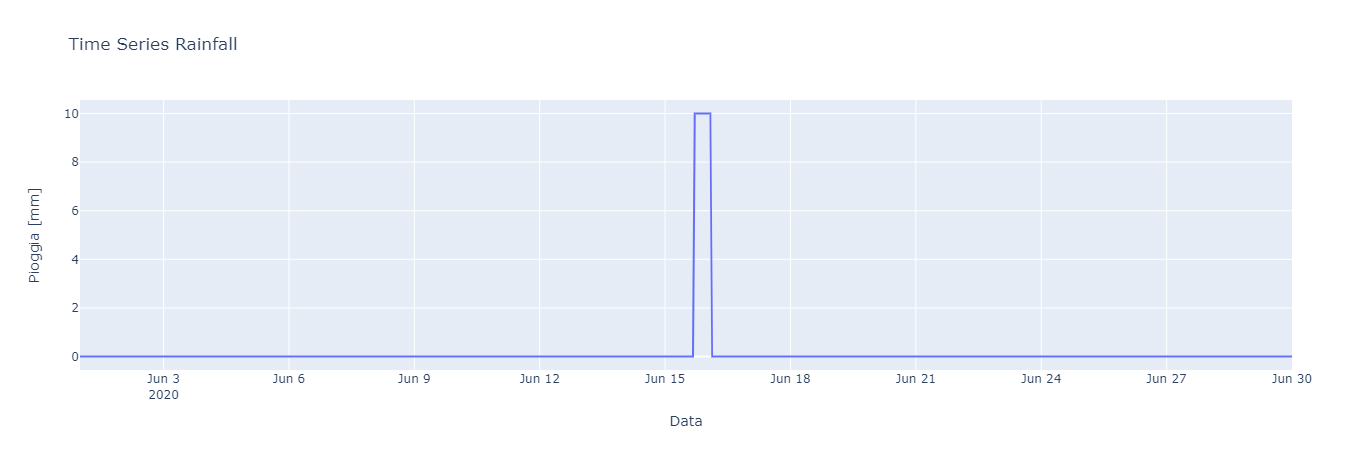

In [29]:
kl = pd.read_csv(file_name,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Data'
kl.columns.values[1] = 'Pioggia [mm]' 
fig = px.line(kl, x='Data', y='Pioggia [mm]', title='Time Series Rainfall')
fig.show()

## Plot water suction $\psi$

 ### Intial condition for water suction $\psi$

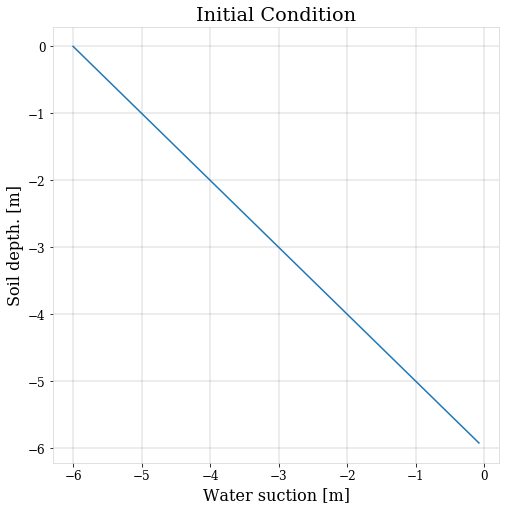

In [30]:
fig = plt.figure(figsize=(8,13/1.62))
ds1.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]') 
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

 ### Water suction $\psi$ among the soil depth in your simulation  

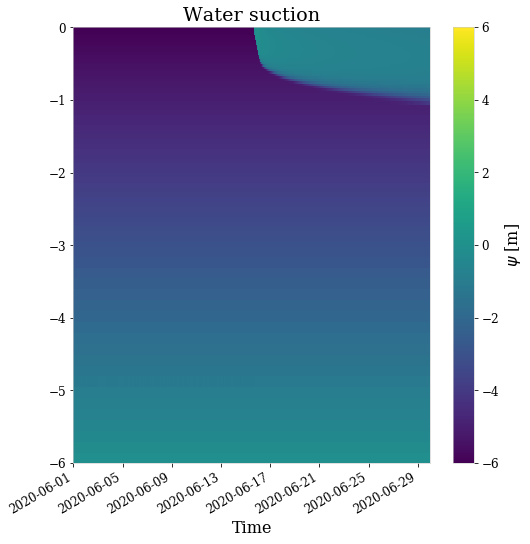

In [31]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds1.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')

## Plot water content  $\theta$

 ### Water content $\theta$ among the soil depth in your simulation

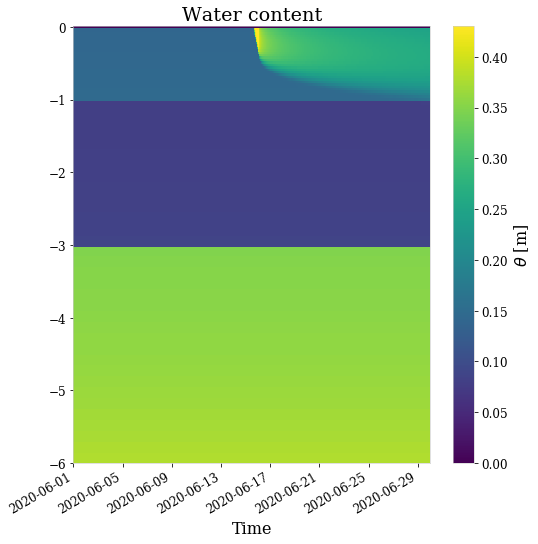

In [32]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds1.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')


### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [41]:
myDate = ['2020-06-01 00:00:00','2020-06-15 17:00:00','2020-06-16 04:00:00','2020-06-30 00:00:00']

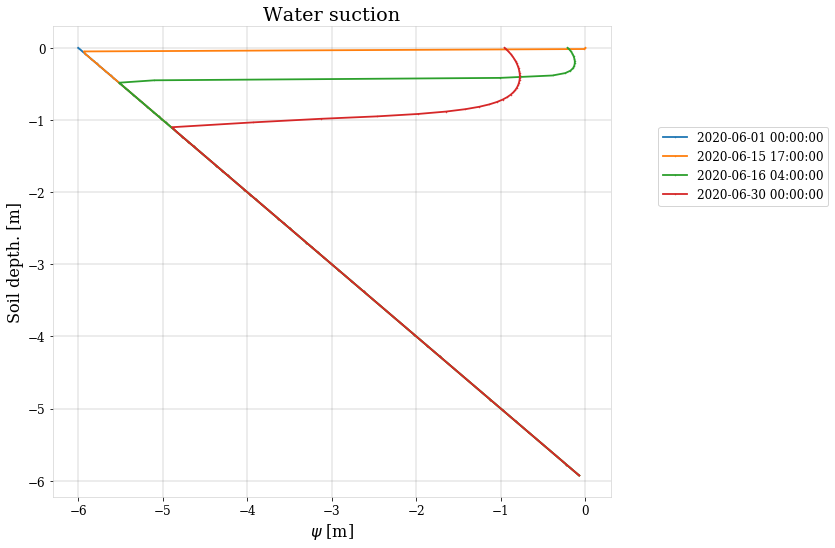

In [42]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds1.psi.sel(time=myDate[i],).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

Vengono plottati gli andamenti di suzione rispettivamente <font color="blue">prima dell'inizio della precipitazione</font>, <font color="orange">dopo un'ora di precipitazione intensa</font>, <font color="green">dopo 12 ore di precipitazione intensa</font> e <font color="red">a fine mese</font>.

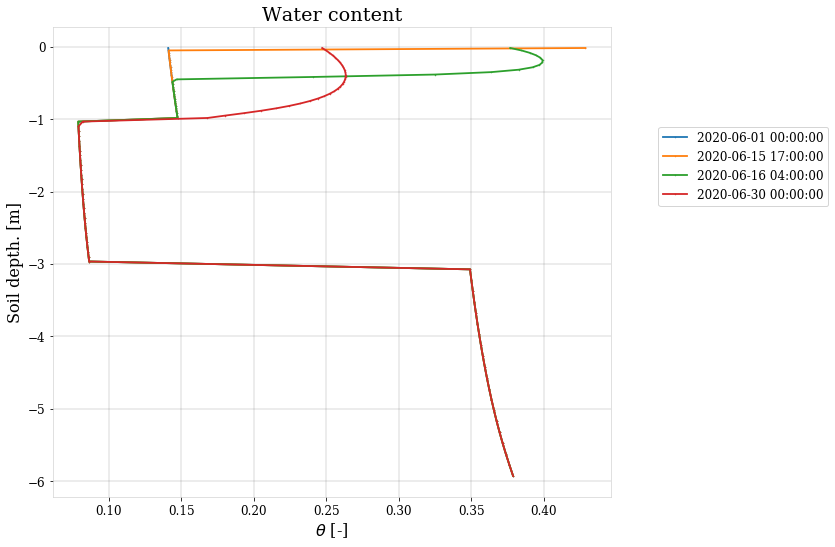

In [43]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds1.theta.sel(time=myDate[i],depth=ds1.depth.values[0:len(ds1.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot top-bottom flux 

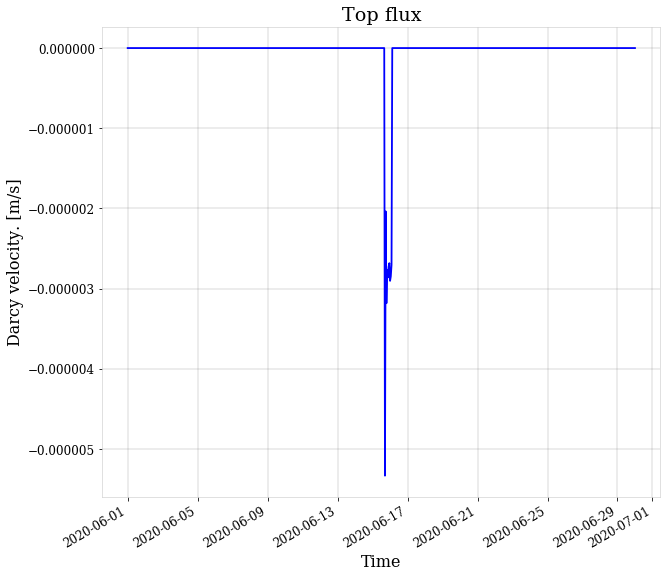

In [44]:
fig = plt.figure(figsize=(10,14/1.618))
ds1.darcyVelocity.sel(dualDepth=ds1.dualDepth[len(ds1.dualDepth)-1], time=ds1.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

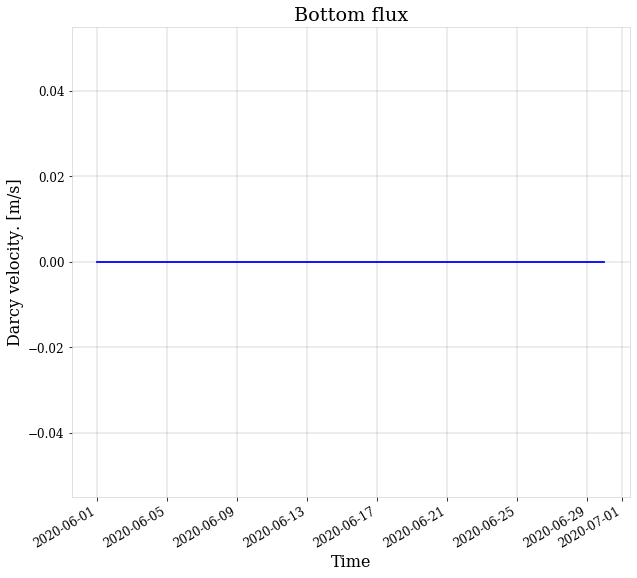

In [45]:
fig = plt.figure(figsize=(10,14/1.618))
ds1.darcyVelocity.sel(dualDepth=ds1.dualDepth[0], time=ds1.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot Error 

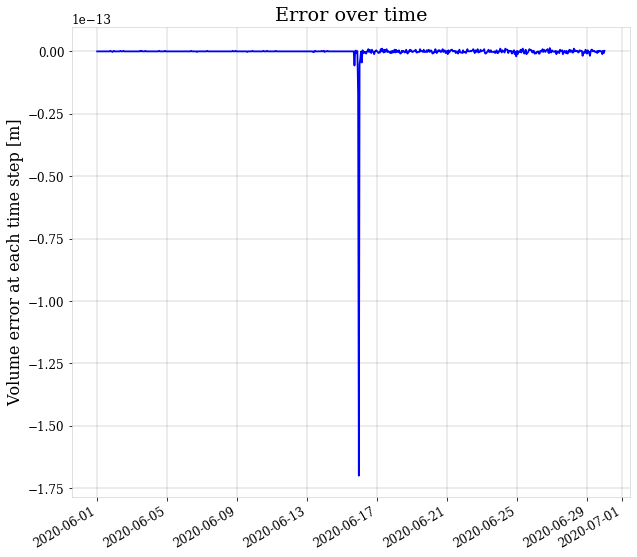

In [46]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds1.error.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)## Plot Error 